## Import Libraries

In [1]:
from typing import Tuple
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

## Function definitions

In [2]:
def plot_feature_frequency(df: pd.DataFrame, column_name: str, top_n: int= None, 
                           figsize: Tuple[int, int] = (10,8)) -> None:
    column_freq = df[column_name].value_counts()[:top_n]
    column_freq.plot(kind="barh", figsize=figsize)
    plt.title(f"Frequency count for {column_name}")
    plt.show();

In [3]:
def plot_feature_distribution(df: pd.DataFrame, column_name: str, figsize: Tuple[int, int] = (16,8)):
    plt.figure(figsize = figsize)
    sns.distplot(df[column_name], rug=True, rug_kws={"color": "g"},
                 kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                 hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})
    plt.title(f"Distribution for {column_name}")
    plt.show();

# Exploratory Data Analysis

In [4]:
# load the data
df = pd.read_csv("../data/bmw.csv")

In [5]:
# inspect the data
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [6]:
# get info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
model           10781 non-null object
year            10781 non-null int64
price           10781 non-null int64
transmission    10781 non-null object
mileage         10781 non-null int64
fuelType        10781 non-null object
tax             10781 non-null int64
mpg             10781 non-null float64
engineSize      10781 non-null float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


In [7]:
# there are 117 duplicates
len(df[df.duplicated()])

117

In [8]:
# There are no missing values
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

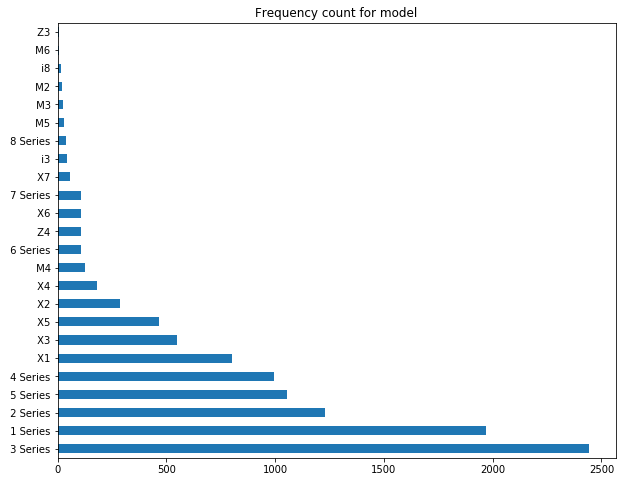

In [9]:
# what model is the most popular model
plot_feature_frequency(df, column_name="model")

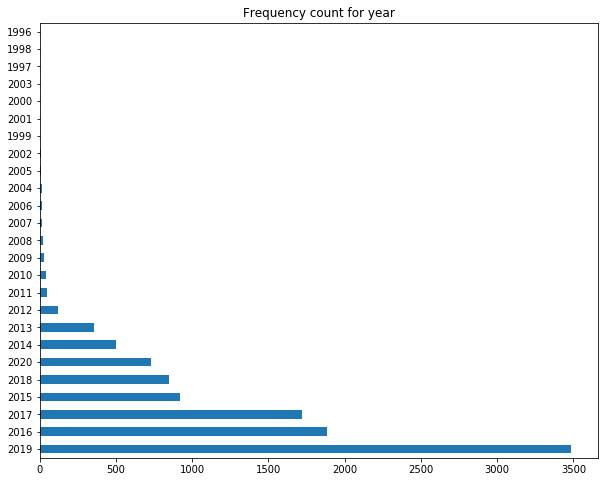

In [10]:
# what BMW model years were available
plot_feature_frequency(df, column_name="year")

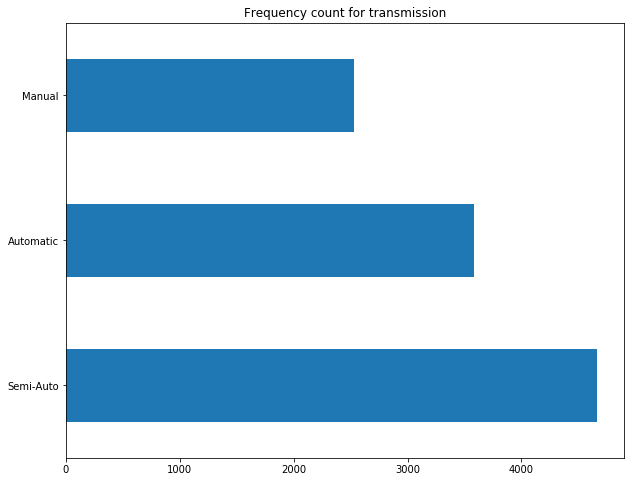

In [11]:
# what car modes were popularly sold
plot_feature_frequency(df, column_name="transmission")

In [21]:
( "engine_class": ["Above 3.0-litres Engine"], "model_type":["z_model"]})

array(['Automatic', 'Manual', 'Semi-Auto'], dtype=object)

In [25]:
df.fuelType.unique()

array(['Diesel', 'Petrol', 'Other', 'Hybrid', 'Electric'], dtype=object)

In [27]:
df.year.value_counts()

2019    3485
2016    1882
2017    1721
2015     922
2018     848
2020     733
2014     501
2013     357
2012     119
2011      51
2010      41
2009      30
2008      23
2007      16
2006      14
2004      12
2005       6
2002       6
1999       4
2001       3
2000       2
2003       2
1997       1
1998       1
1996       1
Name: year, dtype: int64

In [26]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

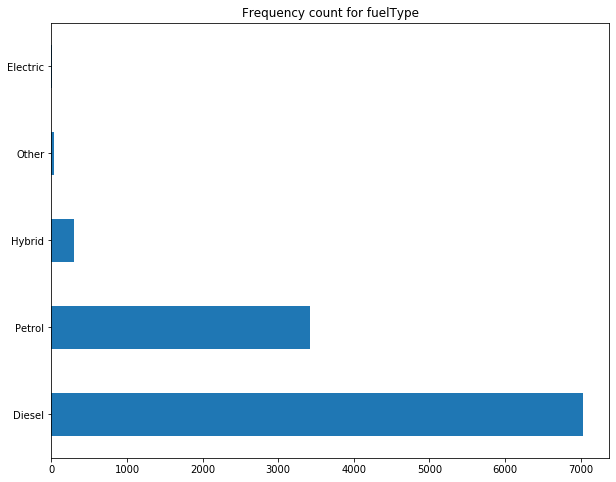

In [12]:
# what fuel type does the cars make use of?
plot_feature_frequency(df, column_name="fuelType")

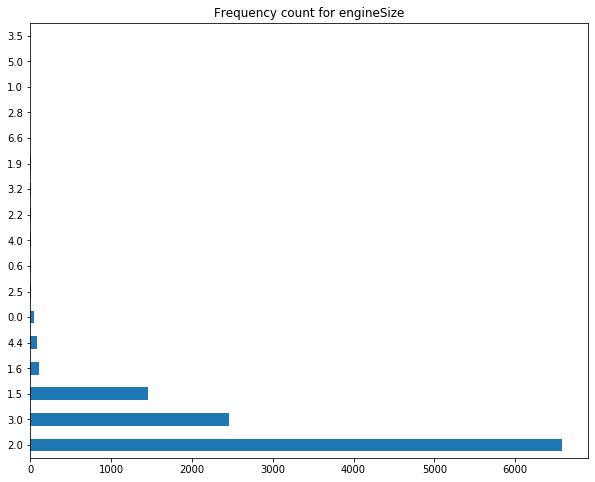

In [13]:
# what are the engine types available 
plot_feature_frequency(df, column_name="engineSize")

In [14]:
df.price.value_counts()[:10]

20980    45
15000    43
14000    40
18000    37
29995    36
23990    33
15995    33
19995    33
16500    33
13000    33
Name: price, dtype: int64

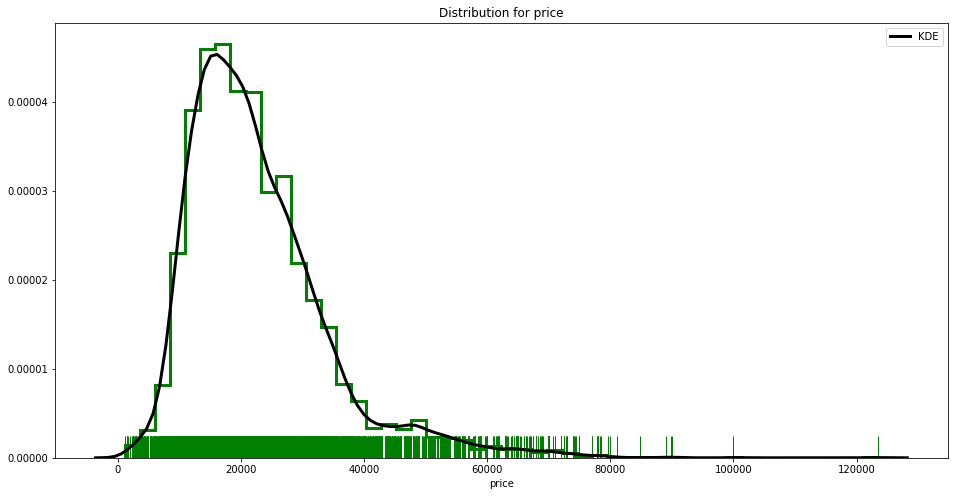

In [15]:
# what is the price distribution available in the market for used BMW Cars
plot_feature_distribution(df, column_name="price")

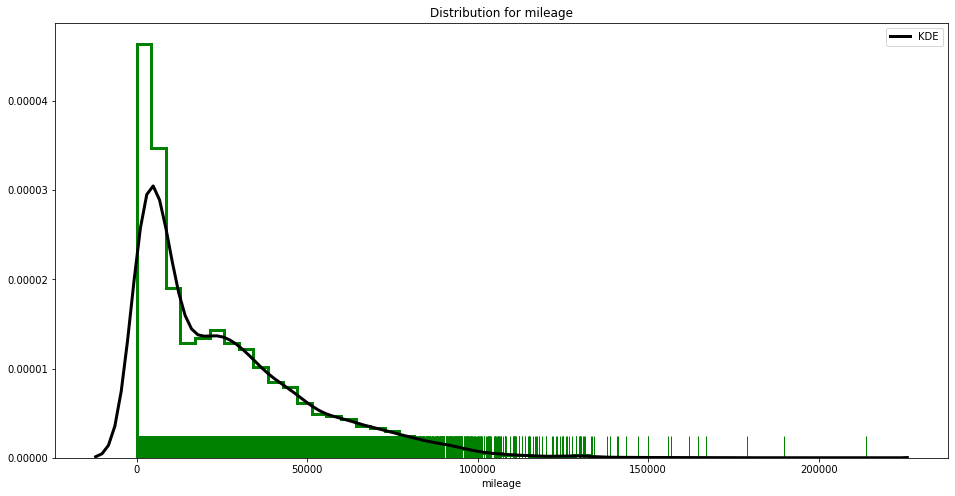

In [16]:
# what are the car mileage
plot_feature_distribution(df, column_name="mileage")

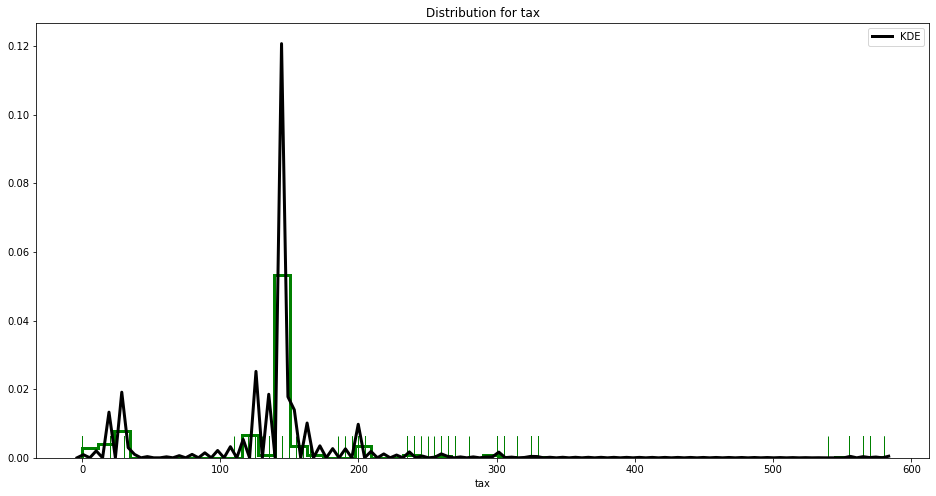

In [17]:
# How much are been paid for car tax
plot_feature_distribution(df, column_name="tax")

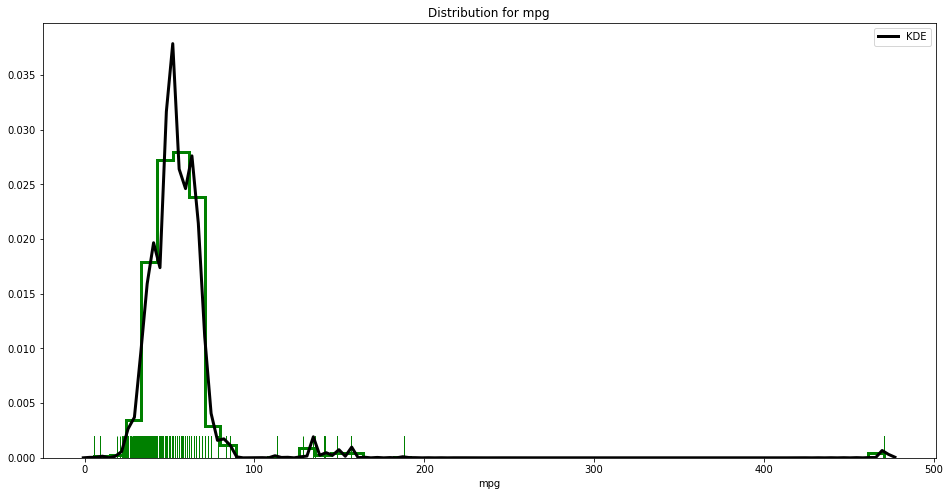

In [18]:
# what are the mpgs of the cars available
plot_feature_distribution(df, column_name="mpg")

In [19]:
# understand the correlation among features
corr = df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
corr

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
model,1.000000,0.096229,0.018345,0.047853,-0.065905,0.034384,0.073771,0.264668,0.022638
year,0.096229,1.000000,0.198285,0.055488,-0.077275,0.040363,0.096063,0.191193,0.084269
price,0.018345,0.198285,1.000000,-0.117982,0.317591,0.015975,0.034643,0.074173,0.071743
transmission,0.047853,0.055488,-0.117982,1.000000,-0.359719,0.000420,-0.032290,0.066110,-0.068974
mileage,-0.065905,-0.077275,0.317591,-0.359719,1.000000,-0.030097,0.076200,-0.070952,0.040883
fuelType,0.034384,0.040363,0.015975,0.000420,-0.030097,1.000000,0.164584,0.391162,0.266764
tax,0.073771,0.096063,0.034643,-0.032290,0.076200,0.164584,1.000000,0.223547,0.270784
mpg,0.264668,0.191193,0.074173,0.066110,-0.070952,0.391162,0.223547,1.000000,0.238253
engineSize,0.022638,0.084269,0.071743,-0.068974,0.040883,0.266764,0.270784,0.238253,1.000000


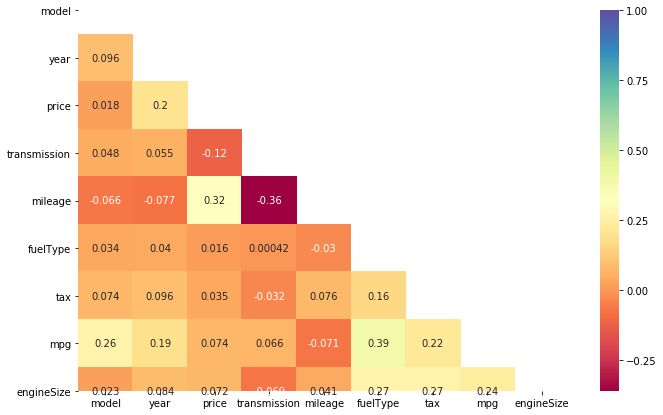

In [20]:
plt.figure(figsize=(11,7))
#sns.heatmap(df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1))

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

# using the upper triangle matrix as mask 
sns.heatmap(corr, cmap="Spectral", annot=True, mask=matrix)

# Conclusion and Next Steps
- The '3 series' is the most popular model type available in the dataset
- The 2019 car model seems the be the most popular followed by 2016 ie. most of the cars are 2 years old
- There are no problems with the data types
- There 117 duplicates in the datasets
- There 10,781 observations and 9 features in the datasets
- There are no missing values in the dataset
- There are little or correlation among the features in the dataset
- The dataset contains a good blend of Semi Automatic, Automatic and Manual cars, but cars with Semi Automatic are the most popular type
- The car's mpg are ranging between 80 and mpg
- The car mileage are in the range of 20k, 30k 
- Most of the car engines have Petrol engines between 1.0-2.0 litres
- More insights into the data is required
- Data cleaning is important to drop duplicates
- We will frame up the problem as a predict task to predict the Car Price given the features